<a href="https://colab.research.google.com/github/bhatkishan42/LOAN-CASE-STUDY/blob/main/CASE_STUDY_1_LOAN_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOAN CASE STUDY


**Google colab(VIEW ONLY)**: https://colab.research.google.com/drive/1cZ1zalwx_HxX0uW2SBY_iTtFOZE41E4V?usp=sharing



## Description:
This case study aims to give you an idea of applying EDA in a real business scenario. In this case study,
apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic
understanding of risk analytics in banking and financial services and understand how data is used to
minimise the risk of losing money while lending to customers.


In [44]:
#installing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import itertools 
import warnings
warnings.filterwarnings("ignore")


Assumption and key-components
* Target 0 = Clients who pay on time
* Target 1 = Clients with loan payment Difficulty
* app_d(Raw),app_12 & app_1 (cleaned,columns dropped) are same data set.




#### Import Data
* Data is linked into drive and read in google colab.

In [45]:
app_d = pd.read_csv("/content/drive/MyDrive/Stige internship/application_data.csv")
pre_d = pd.read_csv("/content/drive/MyDrive/Stige internship/previous_application.csv")
print("Dimension of application data          : ",app_d.shape)
print("Dimension of previous application data : ",pre_d.shape)


Dimension of application data          :  (307511, 122)
Dimension of previous application data :  (1670214, 37)


Lets explore the data.

In [46]:
app_d.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,...,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,...,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,...,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,

In [47]:
pre_d.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### Preliminary analysis

Includes both datasets

#### Application data

In [48]:
app_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [49]:
# Data missing 
# Percentage of empty data in a columns for both data sets.
# We'll Drop or ignore coulmns where missing value % is >50 in both data sets.
# Assigning new values where columns are dropped for each data set
ad1 = (app_d.isna().sum()/app_d.shape[0])*100
round(ad1,2).sort_values(ascending =False)[0:50]


COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGAREA_AVG               55.18
NONLIVINGARE

* Calculation of null values if null values are more than 50% it is discarded
* Below output gives null values in %



Below are the columns are dropped due to null values more than 50% or unwanted column

In [50]:
# Dropping unWanted
app_1 =app_d.drop(columns=['COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_MEDI',
                   'NONLIVINGAPARTMENTS_AVG','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_MODE',
                   'LIVINGAPARTMENTS_AVG','FLOORSMIN_MEDI','FLOORSMIN_MODE','FLOORSMIN_AVG','YEARS_BUILD_MEDI','YEARS_BUILD_AVG',
                   'YEARS_BUILD_MODE','OWN_CAR_AGE','LANDAREA_MODE','LANDAREA_AVG','LANDAREA_MEDI','BASEMENTAREA_MEDI',     
                   'BASEMENTAREA_AVG','BASEMENTAREA_MODE','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','NONLIVINGAREA_MEDI',
                   'NONLIVINGAREA_AVG','NONLIVINGAREA_MODE','ELEVATORS_MODE','ELEVATORS_AVG', 'ELEVATORS_MEDI','WALLSMATERIAL_MODE',
                   'APARTMENTS_MODE','APARTMENTS_AVG','APARTMENTS_MEDI','ENTRANCES_MEDI','ENTRANCES_MODE','ENTRANCES_AVG',         
                   'LIVINGAREA_MEDI','LIVINGAREA_MODE','LIVINGAREA_AVG','HOUSETYPE_MODE'])

In [51]:
round(app_1.isna().sum()/app_1.shape[0]).sort_values (ascending = False)

AMT_REQ_CREDIT_BUREAU_YEAR    0.0
CNT_FAM_MEMBERS               0.0
FLAG_MOBIL                    0.0
FLAG_EMP_PHONE                0.0
FLAG_WORK_PHONE               0.0
                             ... 
FLAG_DOCUMENT_2               0.0
FLAG_DOCUMENT_3               0.0
FLAG_DOCUMENT_4               0.0
FLAG_DOCUMENT_5               0.0
SK_ID_CURR                    0.0
Length: 79, dtype: float64

In [52]:
#application
app_12=(app_1.isna().sum()/app_1.shape[0])*100
round(app_12.sort_values (ascending =False)[0:50])

FLOORSMAX_MODE                  50.0
FLOORSMAX_AVG                   50.0
FLOORSMAX_MEDI                  50.0
YEARS_BEGINEXPLUATATION_MEDI    49.0
YEARS_BEGINEXPLUATATION_MODE    49.0
YEARS_BEGINEXPLUATATION_AVG     49.0
TOTALAREA_MODE                  48.0
EMERGENCYSTATE_MODE             47.0
OCCUPATION_TYPE                 31.0
AMT_REQ_CREDIT_BUREAU_YEAR      14.0
AMT_REQ_CREDIT_BUREAU_QRT       14.0
AMT_REQ_CREDIT_BUREAU_HOUR      14.0
AMT_REQ_CREDIT_BUREAU_DAY       14.0
AMT_REQ_CREDIT_BUREAU_WEEK      14.0
AMT_REQ_CREDIT_BUREAU_MON       14.0
NAME_TYPE_SUITE                  0.0
DEF_60_CNT_SOCIAL_CIRCLE         0.0
OBS_30_CNT_SOCIAL_CIRCLE         0.0
DEF_30_CNT_SOCIAL_CIRCLE         0.0
OBS_60_CNT_SOCIAL_CIRCLE         0.0
AMT_GOODS_PRICE                  0.0
AMT_ANNUITY                      0.0
CNT_FAM_MEMBERS                  0.0
DAYS_LAST_PHONE_CHANGE           0.0
DAYS_EMPLOYED                    0.0
FLAG_OWN_REALTY                  0.0
TARGET                           0.0
F

In [53]:
app_1.groupby('CODE_GENDER').CODE_GENDER.count()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

#### Previous application data

In [54]:
pre_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [55]:
# Percentage of null values in data set
pre1 = (pre_d.isna().sum()/pre_d.shape[0])*100
pd.Series(round(pre1,2).sort_values(ascending =False))

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
DAYS_TERMINATION               40.30
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
AMT_GOODS_PRICE                23.08
CNT_PAYMENT                    22.29
AMT_ANNUITY                    22.29
PRODUCT_COMBINATION             0.02
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
AMT_APPLICATION                 0.00
NAME_PAYMENT_TYPE               0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
C

In [56]:
round(pre_d.isnull().mean(axis=0).sort_values(ascending=False)*100,2)

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
DAYS_TERMINATION               40.30
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
AMT_APPLICATION                 0.00
NAME_PAYMENT_TYPE               0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
C

Below are the columns are dropped due to null values more than 50% or unwanted column

In [57]:
# Dropping unWanted
pre_1 =pre_d.drop(['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
                   'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION'],axis = 1)
pre_1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [58]:
pre_1.CODE_REJECT_REASON  

0          XAP
1          XAP
2          XAP
3          XAP
4           HC
          ... 
1670209    XAP
1670210    XAP
1670211    XAP
1670212    XAP
1670213    XAP
Name: CODE_REJECT_REASON, Length: 1670214, dtype: object

# Exploratory data analysis


### Univariate

*   Explanation in Text box
*   10 lines of Data visualization(Univariate)
*   15+ visualization (Univariate)



Box plot to determine outliers in annuity amounts.

---

+ Annuity anount lies Between 0-5k below and outside the box are ouliers and they do not fit in pattern.

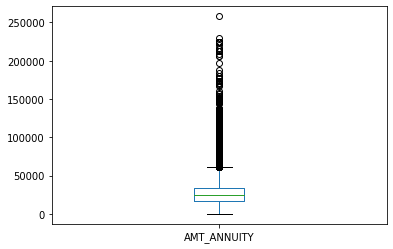

In [59]:
app_1.AMT_ANNUITY.fillna(0).plot(kind = 'box')

#### Application data

* Distribution plot for goods price and annuity (Both repayers and defaulters)
* We can see that annuity and goods price is more area wise compared to defaulters
* Fill na makes graph more accurate we assume null values as 0

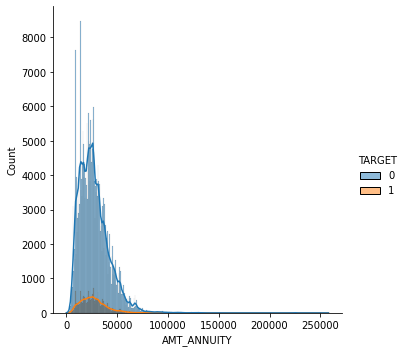

In [60]:
# Major customer pay around <=50000 as contract amount.
# Fill na makes graph more accurate we assume null values as 0
sns.displot(data = app_d.fillna(0),x='AMT_ANNUITY',hue= "TARGET",kde = True)



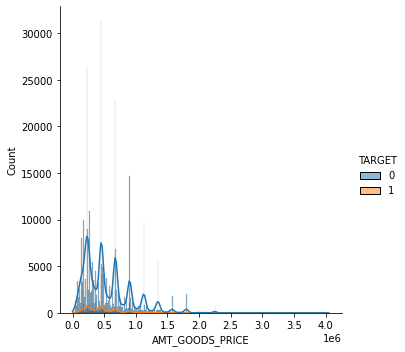

In [61]:
sns.displot(data = app_d.fillna(0),x='AMT_GOODS_PRICE',hue= "TARGET",kde = True)



---


Bar plot determining occupation distribution in dataset


---


  * Laborers,Sales staff,Core staff are dominant in occupation type.
  * IT,HR and reality is least dominant in occupation type.

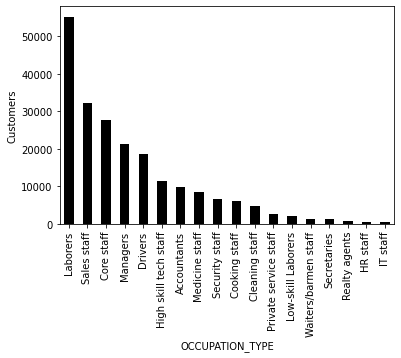

In [62]:
app_1.groupby('OCCUPATION_TYPE').OCCUPATION_TYPE.count().sort_values(ascending =False).plot(kind ='bar',colormap ="cubehelix",ylabel = "Customers")

Bar plot
+ To determine data distribution 
---
+ Female invest/own properties more compared to cars compared to their counterparts 
+ Males tend to own cars more compared to women rather there is a large contrast in owning car


Text(0.5, 1.0, 'Distribution of car ownership over gender')

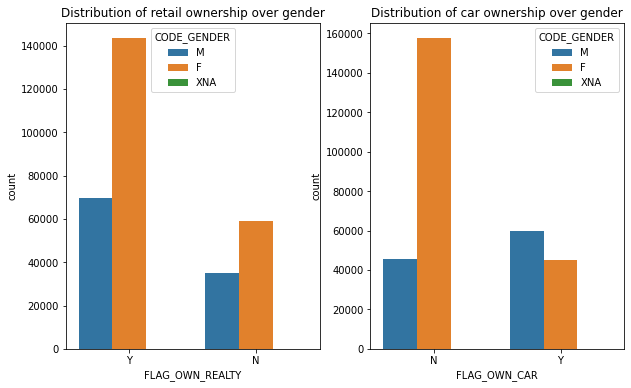

In [63]:

# Female invest/own properties more compared to cars compared to their counterparts 
# Males tend to own cars more compared to women rather there is a large contrast in owning car
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.countplot(data=app_1,x= "FLAG_OWN_REALTY",hue="CODE_GENDER")
plt.title("Distribution of retail ownership over gender")
plt.subplot(122)
sns.countplot(data=app_1,x="FLAG_OWN_CAR",hue="CODE_GENDER")
plt.title("Distribution of car ownership over gender")


In [64]:
app_d.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

Box plot based on occupation and gender

---


* Better paid jobs tend to return loan more frequently compared to low paying jobs
* Bar plot determining occupation distribution in dataset based on Gender
* Male staff (dominant): Laborers,Security staff,Drivers,Low-skill Laborers
* Female staff (dominant):Sales staff,Secretaries,High skill tech staff,Managers


<Figure size 720x432 with 0 Axes>

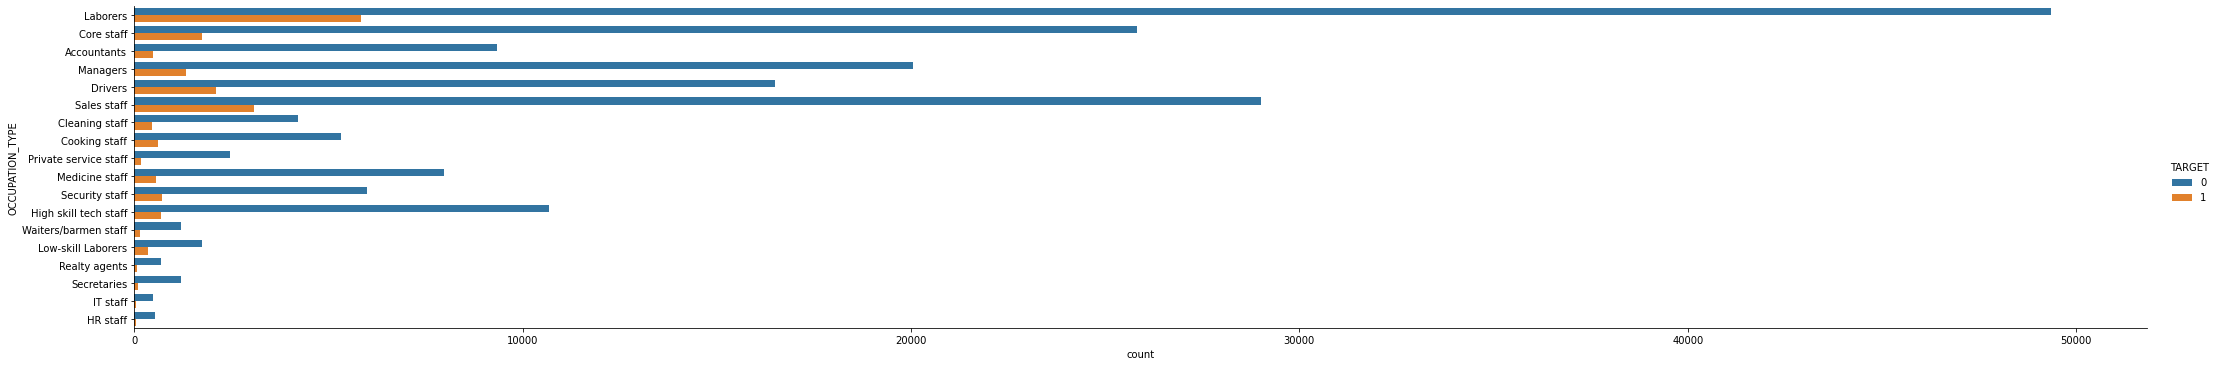

In [65]:
plt.figure(figsize=(10,6))
sns.catplot(data =app_1,y="OCCUPATION_TYPE",hue = "TARGET",kind='count',height=5, aspect=6)




---


Bar plot: Determining Education distribution among customer.



---

+ Majority no of defaulters are from secondary group of education
+ Diffrence in loan repayment is in **Higher education** suggesting a trend where Educated folks tend to repay loan compared to their counter parts.
+ Secondary Group majorly consists of Defaulters (huge diff between repayers and defaulters showing a trend)


<Figure size 720x432 with 0 Axes>

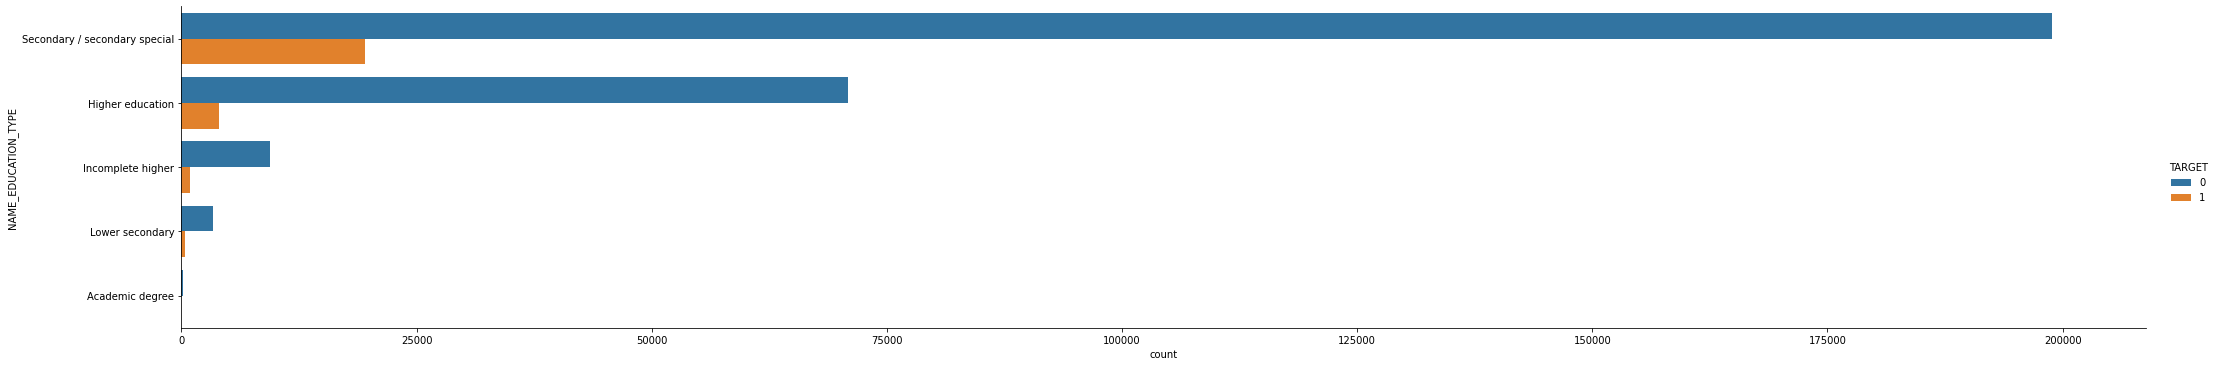

In [66]:
plt.figure(figsize=(10,6))
sns.catplot(data =app_1,y="NAME_EDUCATION_TYPE",hue = "TARGET",kind= 'count',height=5, aspect=6)



---


Bar plot : Distribution of contract and suit type

---


+ Comparison of Contract type between Clients who pay on time Repayers & Clients with loan payment Difficulty defaulters (FIG 1)
+ Customer base accoring to suite.(FIG 2)
+ Repayers & Defaulters vs Gender Base.(FIG 3)


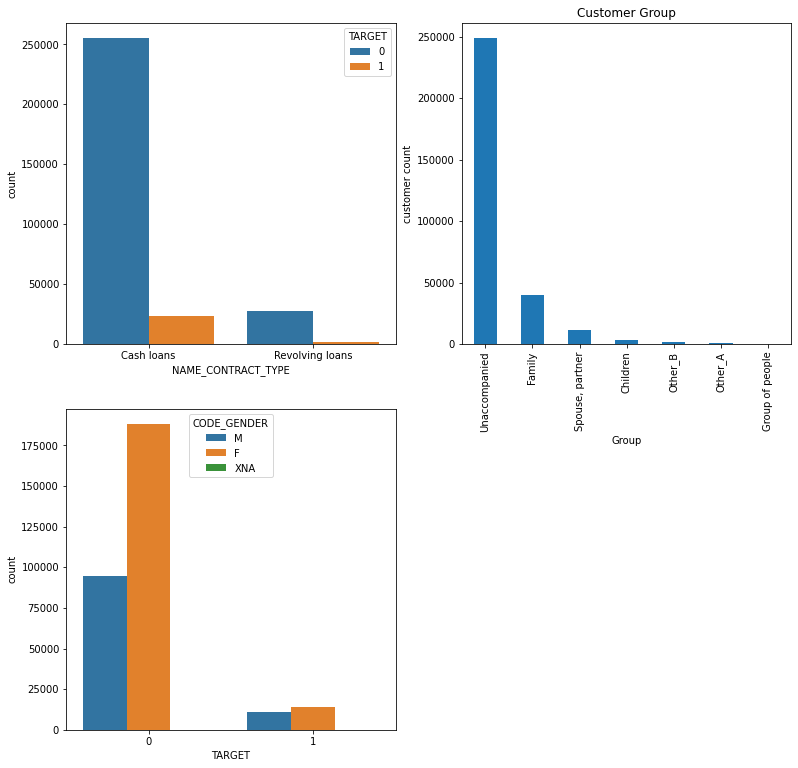

In [67]:

# Gender distribution over contarct type
plt.figure(figsize=(13,13))
plt.subplot(221)
sns.countplot(data =app_1,x="NAME_CONTRACT_TYPE",hue = "TARGET")
plt.subplot(222)
app_1.groupby('NAME_TYPE_SUITE').NAME_TYPE_SUITE.count().sort_values(ascending =False).plot(kind= 'bar',xlabel='Group',ylabel='customer count',title ="Customer Group")
plt.subplot(223)
sns.countplot(data = app_1,x= 'TARGET',hue="CODE_GENDER")


Density plot & Distrobution of Income type

---
+ Determining relation-ship between type of income and target
+ Density of registration days 



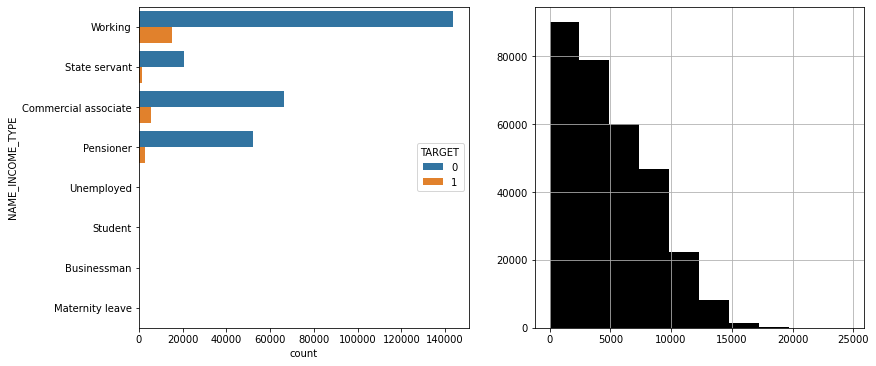

In [68]:
# Univariate
app3 =app_d.DAYS_REGISTRATION.abs()
plt.figure(figsize=(13,13))
plt.subplot(221)
sns.countplot(data =app_1,y="NAME_INCOME_TYPE",hue = "TARGET")
plt.subplot(222)
app3.hist(color = "black")

DISTRIBUTION OF BASED ON ORGANIZATION_TYPE

---



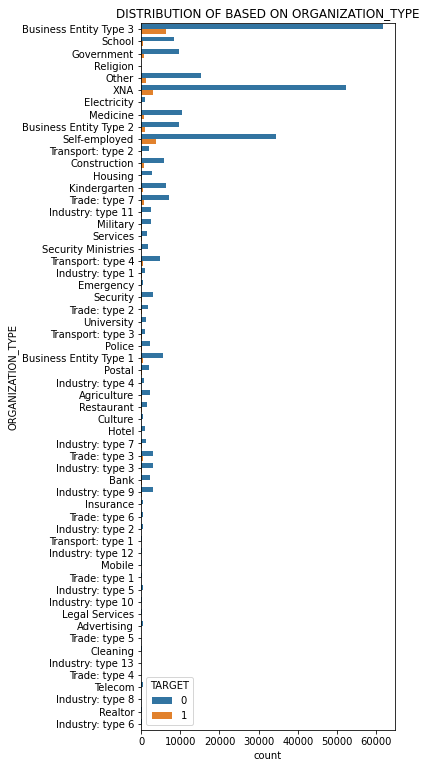

In [69]:
# Females tend to pay there loan back compared to men 
plt.figure(figsize=(10,13))
plt.subplot(121)
plt.title("DISTRIBUTION OF BASED ON ORGANIZATION_TYPE")
sns.countplot(data = app_d,y= 'ORGANIZATION_TYPE',hue="TARGET")



Multiple box plots 

---



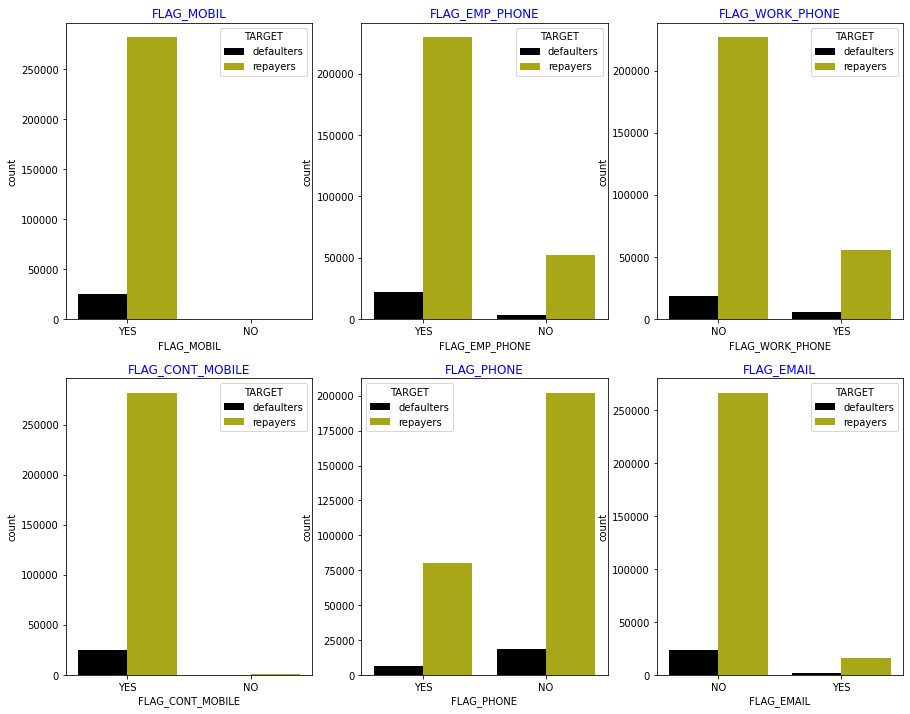

In [70]:

x   = app_1[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
             'FLAG_PHONE', 'FLAG_EMAIL',"TARGET"]]
x["TARGET"] = x["TARGET"].replace({0:"repayers",1:"defaulters"})
x  = x.replace({1:"YES",0:"NO"})

cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']
length = len(cols)

fig = plt.figure(figsize=(15,12))
fig.set_facecolor("white")

for i,j in itertools.zip_longest(cols,range(length)):
    plt.subplot(2,3,j+1)
    sns.countplot(x[i],hue=x["TARGET"],palette=["black","y"])
    plt.title(i,color="b")



---


Imbalance 

---
+ Bar plot of count and percentage of Target.


Text(0.5, 1.0, 'Percentage of Target Distribution')

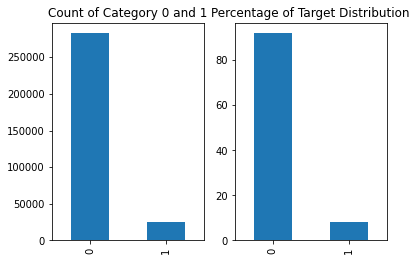

In [71]:
# Imbalance 
g = app_d['TARGET']
d20 = round(pd.concat([g.value_counts(),g.value_counts(normalize=True).mul(100)],axis=1,keys=('counts','percentage')),2)
plt.subplot(121)
d20.counts.plot(kind ="bar")
plt.title("Count of Category 0 and 1")
plt.subplot(122)
d20.percentage.plot(kind = 'bar')
plt.title("Percentage of Target Distribution")



Relationship status of defaulters and repayers

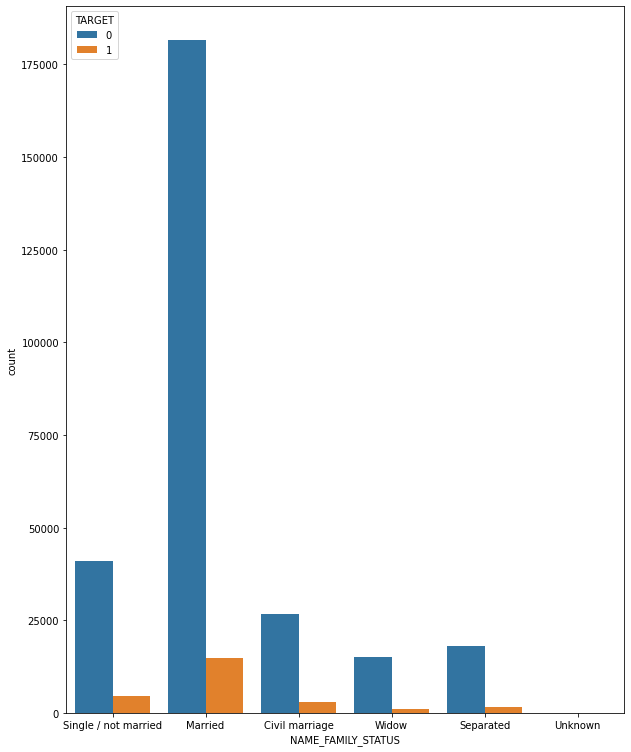

In [72]:
plt.figure(figsize=(10,13))
sns.countplot(data = app_d,x= 'NAME_FAMILY_STATUS',hue = "TARGET")


Distribution of registration days for target variable.
* DAYS_REGISTRATION How many days before the application did client change his registration



Text(0.5, 1.0, 'registration days distribution of repayers & Defaluters')

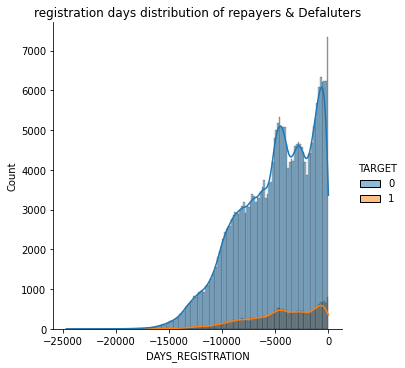

In [73]:
sns.displot(data = app_d.fillna(0),x='DAYS_REGISTRATION',hue= "TARGET",kde = True)
plt.title("registration days distribution of repayers & Defaluters")

#### Previous application data

In [74]:
pre_1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

BOX plot :APPLICATION,CREDIT,ANNUITY,GOODS PRICE,DAYS DECISION

---
*


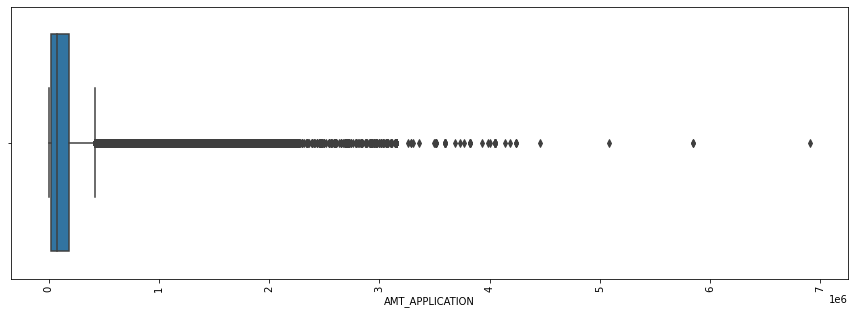

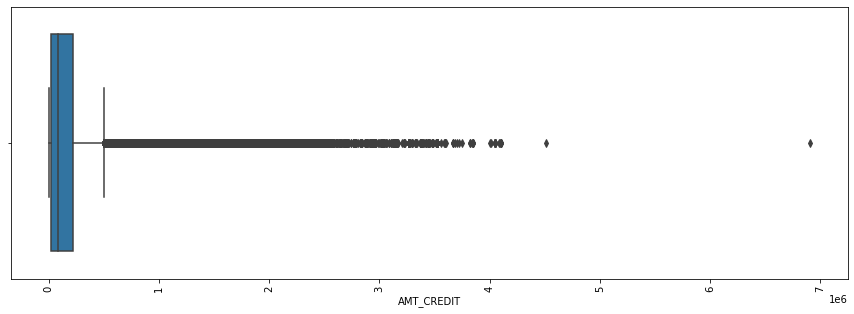

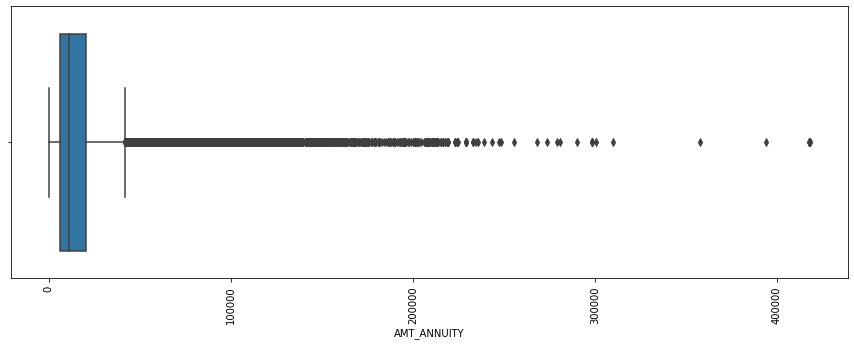

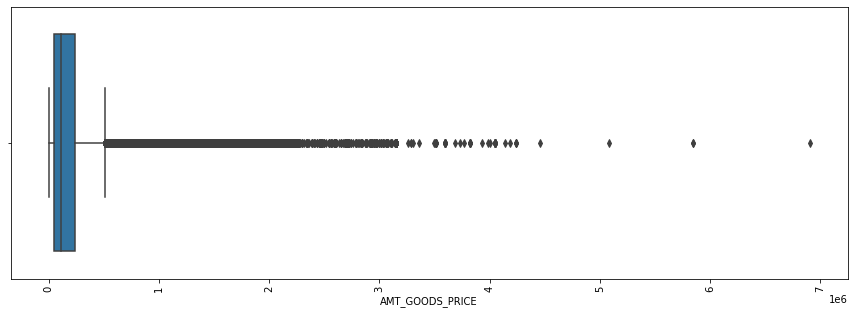

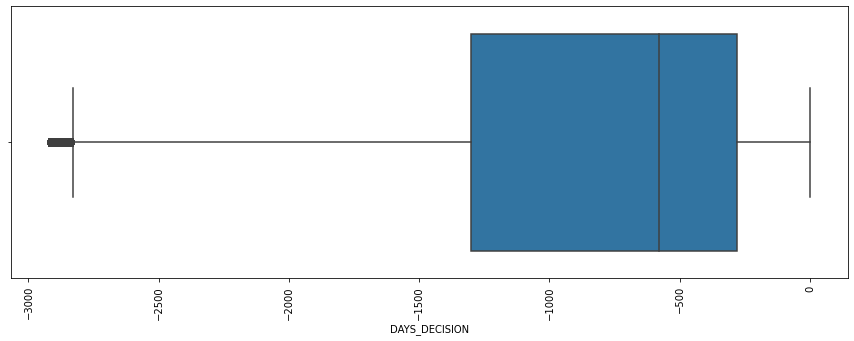

In [75]:
pre_plot = ['AMT_APPLICATION','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_DECISION']
for i in pre_1[pre_plot]:
    plt.figure(1,figsize=(15,5))
    sns.boxplot(pre_1[i])
    plt.xticks(rotation = 90,fontsize =10)
    plt.show()

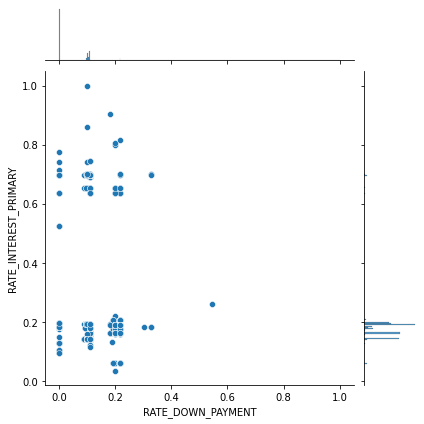

In [76]:
sns.jointplot('RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',data =pre_1)

In [77]:
pre_d.head(6)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0


plots payment ,client,Portfolio
+ cash throug bank is highest and most of them are in repeater.
+ most clients have pos as their portfolio.


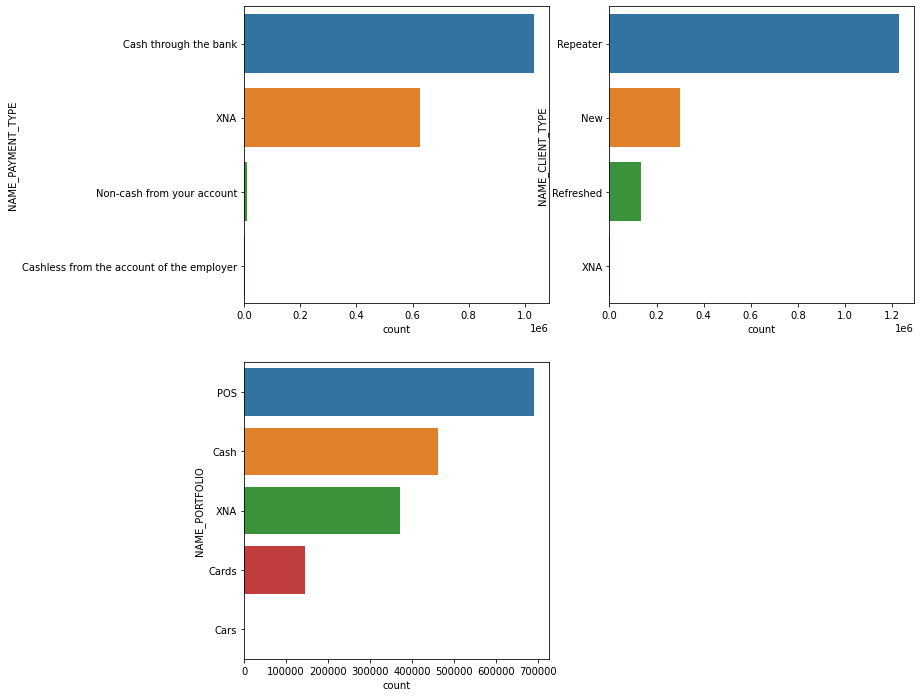

In [78]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.countplot(y='NAME_PAYMENT_TYPE',data = pre_1)
plt.subplot(222)
sns.countplot(y='NAME_CLIENT_TYPE',data = pre_1)
plt.subplot(223)
sns.countplot(y='NAME_PORTFOLIO',data = pre_1)

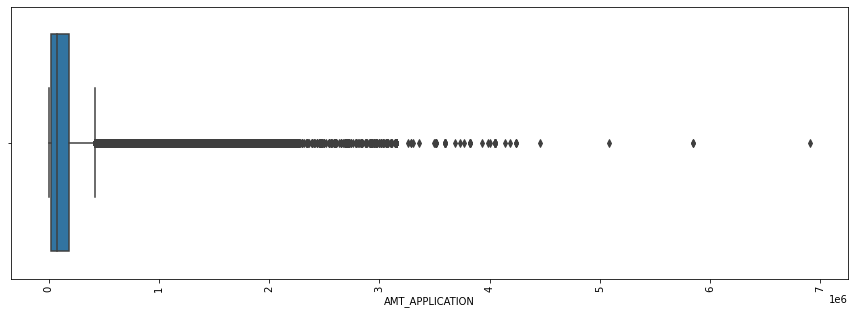

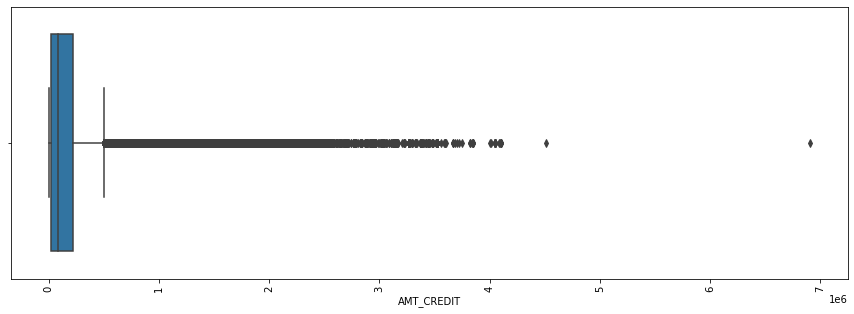

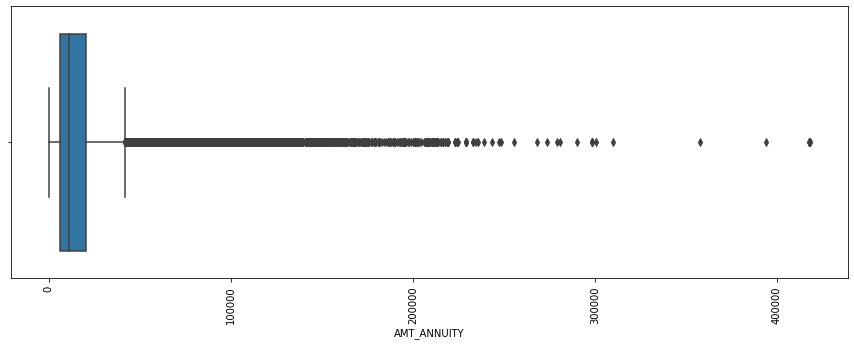

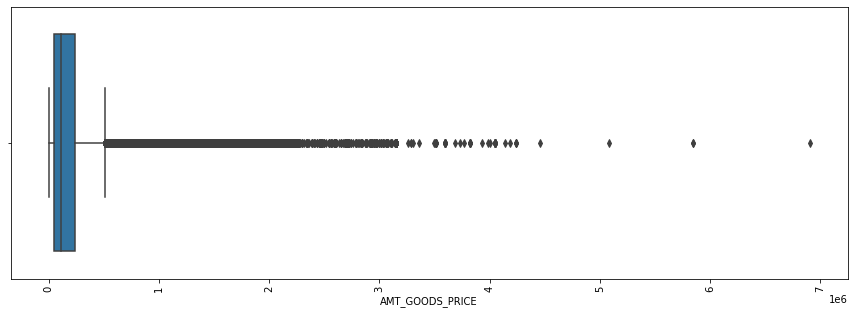

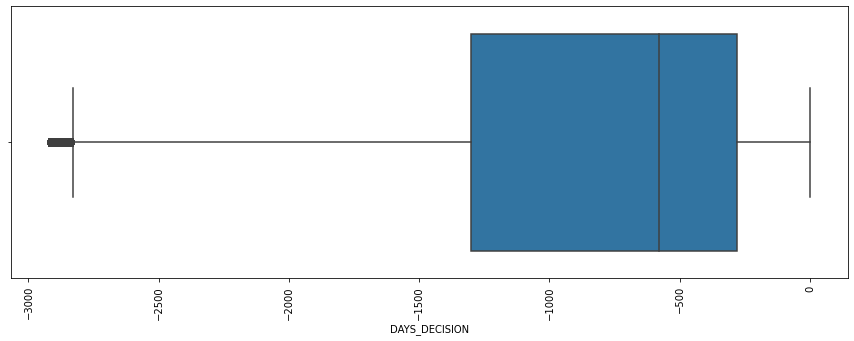

In [79]:
# PLOT A BOX CHART FOR THE CURRENT APPLICATION'S QUANTITATIVE VARIABLES TO SEE THE OUTLIERS
prev_box_2 = ['AMT_APPLICATION','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','DAYS_DECISION']
for i in pre_d[prev_box_2]:
    plt.figure(1,figsize=(15,5))
    sns.boxplot(pre_d[i])
    plt.xticks(rotation = 90,fontsize =10)
    plt.show()

Boxplot : 
+ contract status VS annuity:
+ contract status VS application:
+ contract status VS credit:
+ contract status VS goods price:

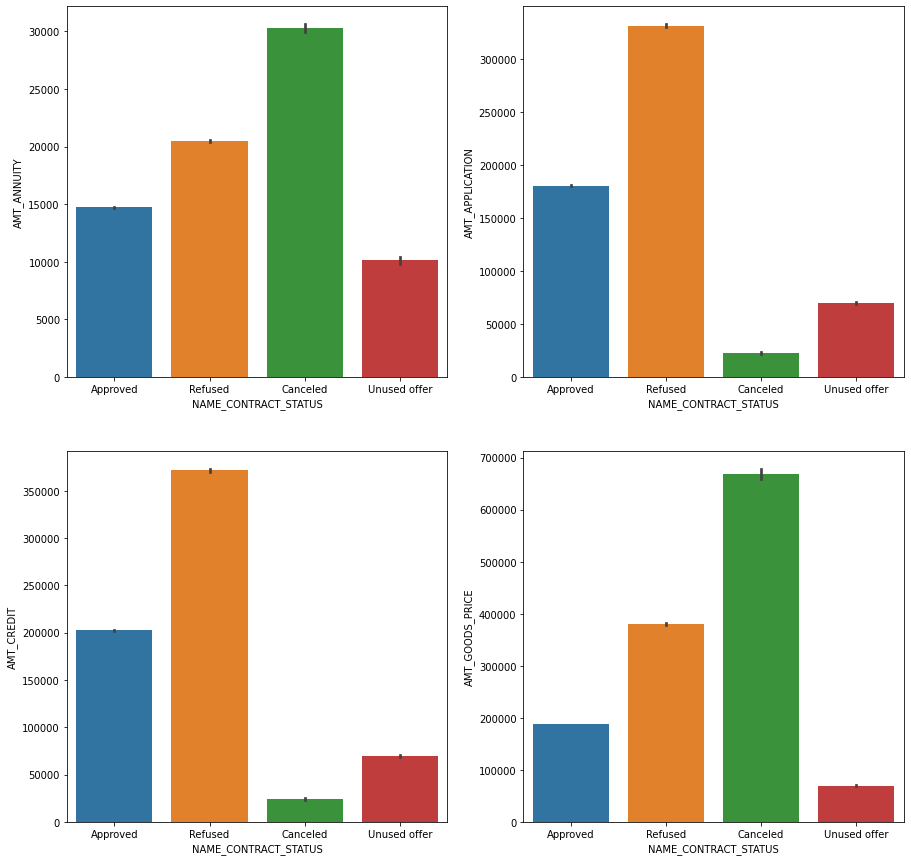

In [80]:
# BIVARIATE ANALYSIS FOR PREVIOUS APPLICATION DATA BASED ON CONTRACT_STATUS
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.barplot(x="NAME_CONTRACT_STATUS", y="AMT_ANNUITY",data=pre_d)
plt.subplot(222)
sns.barplot(x="NAME_CONTRACT_STATUS", y="AMT_APPLICATION",data=pre_d)
plt.subplot(223)
sns.barplot(x="NAME_CONTRACT_STATUS", y="AMT_CREDIT",data=pre_d)
plt.subplot(224)
sns.barplot(x="NAME_CONTRACT_STATUS", y="AMT_GOODS_PRICE",data=pre_d)

### BIVARIATE ANALYSIS

Density spread when compared to total income.

<Figure size 1800x1800 with 0 Axes>

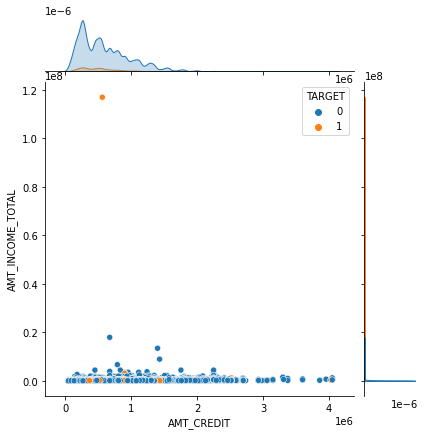

In [81]:
#JOINT PLOT between AMT_CREDIT AND AMT_INCOME_TOTAL
plt.figure(figsize=(25,25))
sns.jointplot('AMT_CREDIT','AMT_INCOME_TOTAL', app_d,hue = "TARGET" )

<Figure size 1800x1800 with 0 Axes>

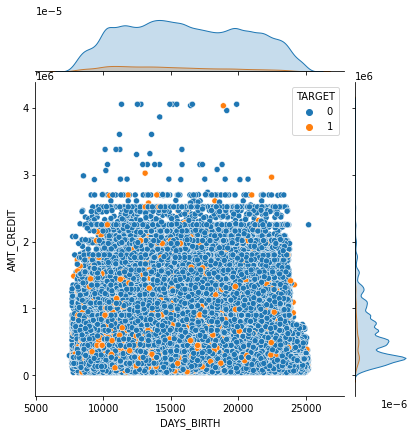

In [82]:
# BIVARIATE ANALYSIS
plt.figure(figsize=(25,25))
sns.jointplot(app_d.DAYS_BIRTH.abs(),'AMT_CREDIT', app_d,hue = "TARGET" )


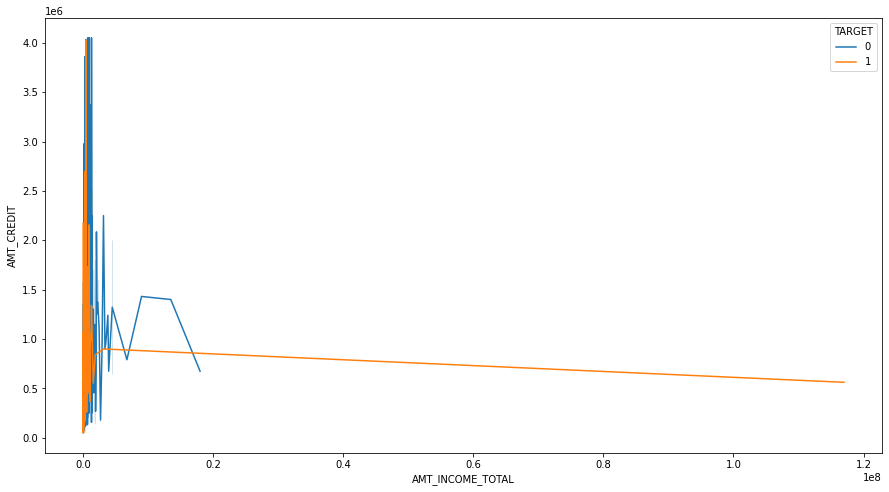

In [83]:
plt.figure(figsize=(15,8))
sns.lineplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT",hue ="TARGET", data=app_d)


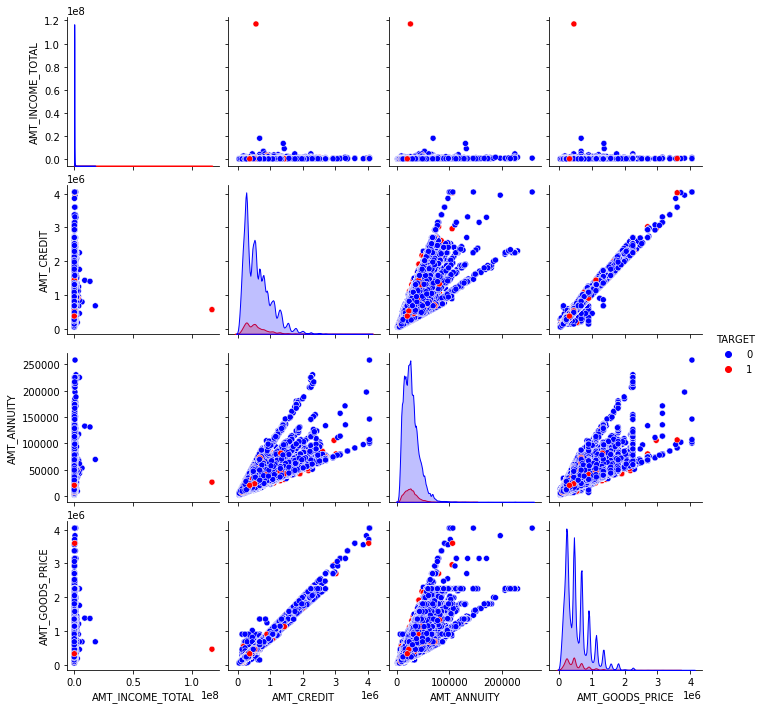

In [84]:
amt = app_d[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
             'AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])

# Joining two sets for in depth analysis 

In [85]:
#app_d
#pre_d
data = pd.merge(app_d,pre_d,on="SK_ID_CURR",how = "inner")


In [ ]:
#data.drop([['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','COMMONAREA_AVG','COMMONAREA_MODE','COMMONAREA_MEDI','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_AVG','NONLIVINGAPARTMENTS_MODE',
#            'FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_AVG','FLOORSMIN_AVG',
#            'FLOORSMIN_MODE','FLOORSMIN_MEDI','YEARS_BUILD_AVG','YEARS_BUILD_MODE','YEARS_BUILD_MEDI','OWN_CAR_AGE','LANDAREA_MODE',
#            'LANDAREA_AVG','LANDAREA_MEDI','BASEMENTAREA_MODE','BASEMENTAREA_MEDI','BASEMENTAREA_AVG','EXT_SOURCE_1','NONLIVINGAREA_AVG',
#            'NONLIVINGAREA_MODE','NONLIVINGAREA_MEDI','ELEVATORS_MEDI','ELEVATORS_AVG','ELEVATORS_MODE','WALLSMATERIAL_MODE',
#            'APARTMENTS_MEDI','APARTMENTS_AVG','APARTMENTS_MODE','ENTRANCES_MEDI','ENTRANCES_MODE','ENTRANCES_AVG','LIVINGAREA_MODE',
#            'LIVINGAREA_MEDI','LIVINGAREA_AVG','HOUSETYPE_MODE','FLOORSMAX_MEDI','FLOORSMAX_AVG','FLOORSMAX_MODE',
#            'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MODE','TOTALAREA_MODE',
#            'EMERGENCYSTATE_MODE','AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','NAME_TYPE_SUITE_y']])

In [88]:
data.select_dtypes(include=np)

,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_x,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,NAME_CONTRACT_TYPE_y,WEEKDAY_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No,Consumer loans,SATURDAY,Y,XAP,Approved,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,Auto technology,low_normal,POS other with interest
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,Cash loans,FRIDAY,Y,XNA,Approved,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,low_normal,Cash X-Sell: low
2,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,Consumer loans,SUNDAY,Y,XAP,Approved,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,Furniture,middle,POS industry with interest
3,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No,Consumer loans,SATURDAY,Y,XAP,Approved,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,Consumer electronics,middle,POS household with interest
4,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN,Consumer loans,FRIDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,XNA,Regional / Local,Connectivity,middle,POS mobile without interest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,Cash loans,F,N,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,THURSDAY,Business Entity Type 3,NaN,block of flats,Panel,No,Cash loans,THURSDAY,Y,XNA,Approved,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,XNA,middle,Cash X-Sell: middle
1413697,Cash loans,F,N,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,THURSDAY,Business Entity Type 3,NaN,block of flats,Panel,No,Revolving loans,SUNDAY,Y,XAP,Refused,XNA,HC,Unaccompanied,Repeater,XNA,Cards,walk-in,Country-wide,Connectivity,XNA,Card Street
1413698,Cash loans,F,N,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,THURSDAY,Business Entity Type 3,NaN,block of flats,Panel,No,Cash loans,FRIDAY,Y,Repairs,Refused,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,XNA,low_normal,Cash Street: low
1413699,Cash loans,F,N,N,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Laborers,THURSDAY,Business Entity Type 3,NaN,block of flats,Panel,No,Cash loans,FRIDAY,Y,XNA,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),XNA,low_normal,Cash X-Sell: low


In [89]:
data.select_dtypes(exclude=np)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,...,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,9251.775,179055.0,179055.0,0.0,179055.0,9,1,0.000000,NaN,NaN,-606,500,24.0,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,98356.995,900000.0,1035882.0,NaN,900000.0,12,1,NaN,NaN,NaN,-746,-1,12.0,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,64567.665,337500.0,348637.5,0.0,337500.0,17,1,0.000000,NaN,NaN,-828,1400,6.0,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755,6737.310,68809.5,68053.5,6885.0,68809.5,15,1,0.100061,NaN,NaN,-2341,200,12.0,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1564014,5357.250,24282.0,20106.0,4860.0,24282.0,5,1,0.212008,NaN,NaN,-815,30,4.0,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413696,456255,0,0,157500.0,675000.0,49117.5,675000.0,0.046220,-16856,-1262,-5128.0,-410,NaN,1,1,1,1,1,0,2.0,1,1,20,0,0,0,0,1,1,0.734460,0.708569,0.113922,0.0742,0.0526,0.9881,NaN,0.0176,0.08,0.0690,0.3750,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,2073384,16400.610,229500.0,254340.0,NaN,229500.0,12,1,NaN,NaN,NaN,-648,-1,24.0,36524

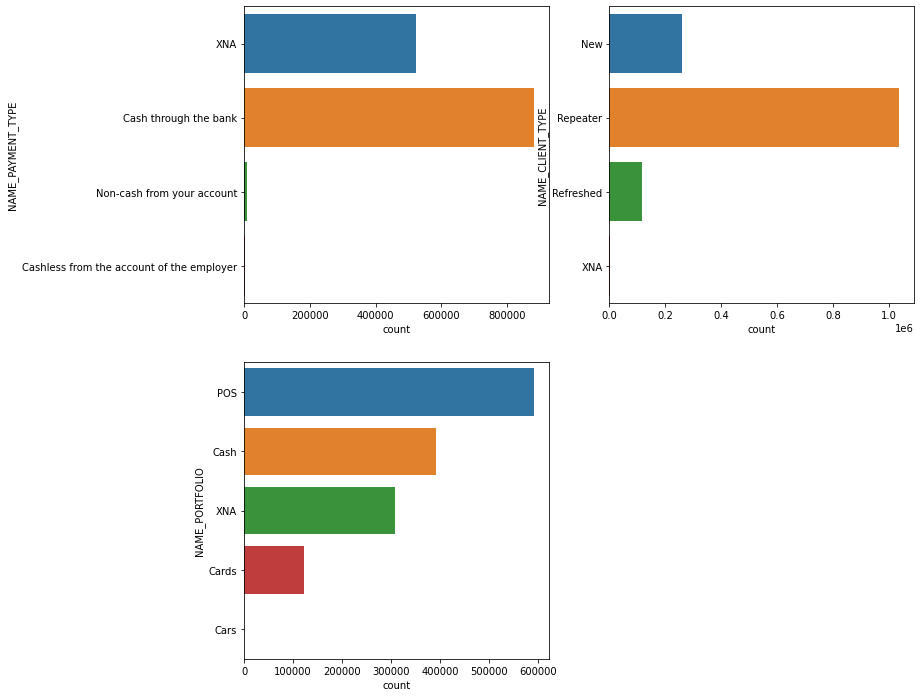

In [90]:
plt.figure(figsize=(12,12))
plt.subplot(221)
sns.countplot(y='NAME_PAYMENT_TYPE',data = data)
plt.subplot(222)
sns.countplot(y='NAME_CLIENT_TYPE',data = data)
plt.subplot(223)
sns.countplot(y='NAME_PORTFOLIO',data = data)

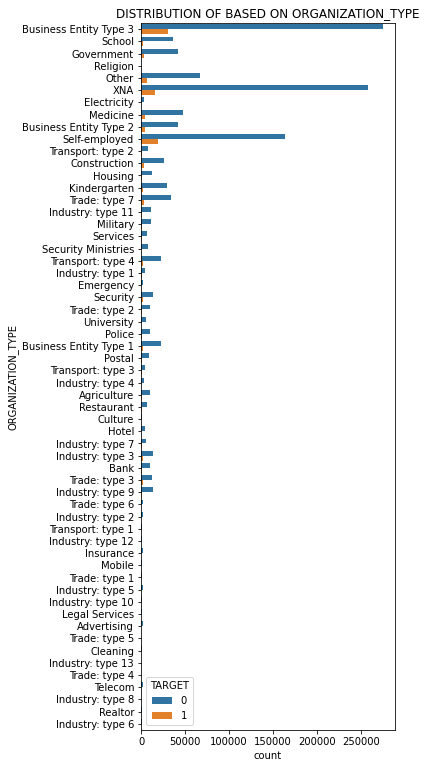

In [91]:
plt.figure(figsize=(10,13))
plt.subplot(121)
plt.title("DISTRIBUTION OF BASED ON ORGANIZATION_TYPE")
sns.countplot(data = data,y= 'ORGANIZATION_TYPE',hue="TARGET")



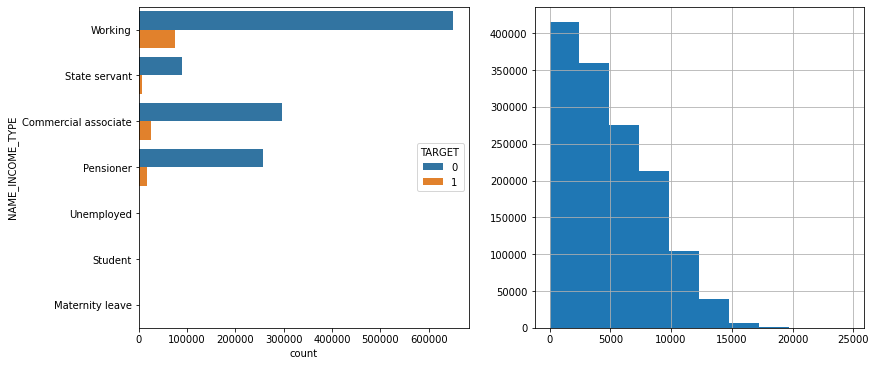

In [92]:
app31 =data.DAYS_REGISTRATION.abs()
plt.figure(figsize=(13,13))
plt.subplot(221)
sns.countplot(data =data,y="NAME_INCOME_TYPE",hue = "TARGET")
plt.subplot(222)
app31.hist()

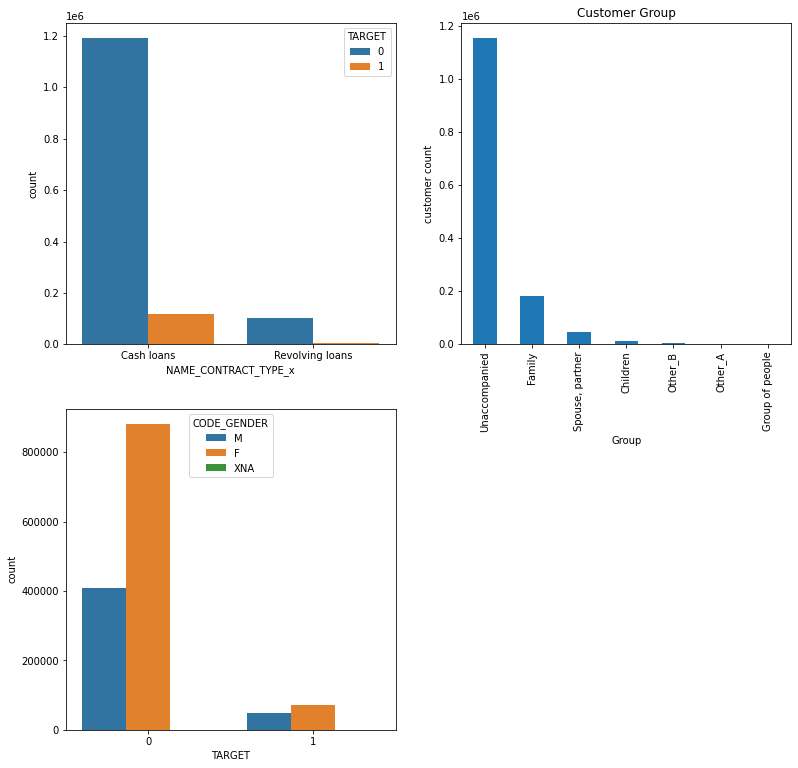

In [93]:
plt.figure(figsize=(13,13))
plt.subplot(221)
sns.countplot(data =data,x="NAME_CONTRACT_TYPE_x",hue = "TARGET")
plt.subplot(222)
data.groupby('NAME_TYPE_SUITE_x').NAME_TYPE_SUITE_x.count().sort_values(ascending =False).plot(kind= 'bar',xlabel='Group',ylabel='customer count',title ="Customer Group")
plt.subplot(223)
sns.countplot(data =data ,x= 'TARGET',hue="CODE_GENDER")

In [ ]:
#plt.figure(figsize=(10,6))
#sns.catplot(data =data,y="OCCUPATION_TYPE",hue ="CODE_GENDER",kind='count',height=5, aspect=6)
